In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
# RAM
df = pd.DataFrame(pd.read_csv("finetune_plantbert.csv", sep=",", skiprows=1, header=None))
df.columns= ["step", "acc", "min1", "max1", "loss", "min2", "max2"]
df = df.drop(["min1", "max1", "min2", "max2"], axis=1)
df['step'] = df['step'].apply(lambda x: x*3.095)
df = df[0:54]
print(df)

df2 = pd.DataFrame(pd.read_csv("finetune_dnabert.csv", sep=",", skiprows=1, header=None))
df2.columns= ["step", "acc", "min1", "max1", "loss", "min2", "max2"]
df2 = df2.drop(["min1", "max1", "min2", "max2"], axis=1)
df2['step'] = df2['step'].apply(lambda x: x*3.095)
df2 = df2[0:54]
print(df2)

       step       acc      loss
0     0.000  0.576948  0.676196
1     3.095  0.582776  0.672098
2     6.190  0.601986  0.667012
3     9.285  0.600259  0.673458
4    12.380  0.613425  0.659649
5    15.475  0.583207  0.687244
6    18.570  0.624218  0.642247
7    21.665  0.627455  0.637675
8    24.760  0.667818  0.604271
9    27.855  0.641269  0.633981
10   30.950  0.654436  0.621218
11   34.045  0.686812  0.579852
12   37.140  0.622275  0.641071
13   40.235  0.654436  0.606650
14   43.330  0.616663  0.655741
15   46.425  0.682927  0.585262
16   49.520  0.692424  0.574758
17   52.615  0.631125  0.663766
18   55.710  0.683790  0.586885
19   58.805  0.693935  0.574723
20   61.900  0.712929  0.556242
21   64.995  0.690265  0.581041
22   68.090  0.718541  0.545581
23   71.185  0.721994  0.542390
24   74.280  0.727390  0.535862
25   77.375  0.729981  0.531607
26   80.470  0.711418  0.543457
27   83.565  0.739909  0.527195
28   86.660  0.733650  0.527382
29   89.755  0.718325  0.545542
30   92.

In [25]:
step = []
acc = []
loss = []
for index, row in df.iterrows():
    if (index%2)==0:
        step.append(df.iloc[index, 0])
        acc.append(df.iloc[index, 1])
        loss.append(df.iloc[index, 2])
df_clean = {"step": step, "acc":acc, "loss":loss}
df_clean = pd.DataFrame(df_clean)
print(df_clean)


step2 = []
acc2 = []
loss2 = []
for index, row in df2.iterrows():
    if (index%2)==0:
        step2.append(df2.iloc[index, 0])
        acc2.append(df2.iloc[index, 1])
        loss2.append(df2.iloc[index, 2])
df2_clean = {"step": step2, "acc":acc2, "loss":loss2}
df2_clean = pd.DataFrame(df2_clean)
print(df2_clean)

      step       acc      loss
0     0.00  0.576948  0.676196
1     6.19  0.601986  0.667012
2    12.38  0.613425  0.659649
3    18.57  0.624218  0.642247
4    24.76  0.667818  0.604271
5    30.95  0.654436  0.621218
6    37.14  0.622275  0.641071
7    43.33  0.616663  0.655741
8    49.52  0.692424  0.574758
9    55.71  0.683790  0.586885
10   61.90  0.712929  0.556242
11   68.09  0.718541  0.545581
12   74.28  0.727390  0.535862
13   80.47  0.711418  0.543457
14   86.66  0.733650  0.527382
15   92.85  0.727822  0.543597
16   99.04  0.732355  0.546527
17  105.23  0.741204  0.520332
18  111.42  0.745305  0.516770
19  117.61  0.746385  0.519529
20  123.80  0.744442  0.531207
21  129.99  0.746385  0.545572
22  136.18  0.745737  0.531692
23  142.37  0.748111  0.528873
24  148.56  0.750270  0.511603
25  154.75  0.752212  0.517480
26  160.94  0.753723  0.516334
      step       acc      loss
0     0.00  0.501403  0.694928
1     6.19  0.576732  0.684597
2    12.38  0.500540  0.697772
3    18.

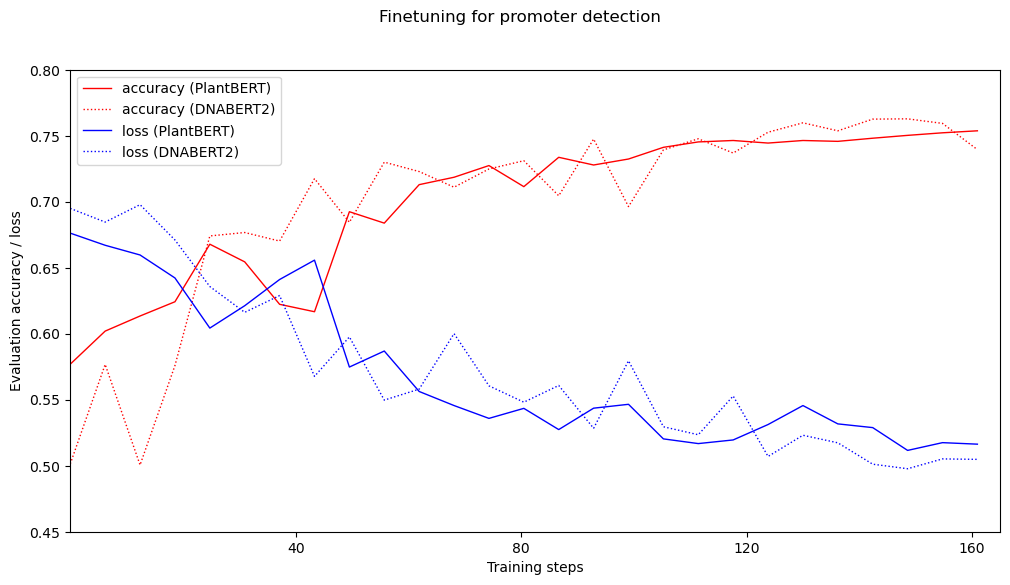

In [40]:
plt.subplots(figsize=(12,6)) # 6 for one row but 12 cause to row
#plt.subplot(1, 2, 1)
plt.plot(df_clean["step"],df_clean["acc"], color="red", label="accuracy (PlantBERT)", linestyle="-", marker="", markersize=1.0, linewidth=1.0)
plt.plot(df2_clean["step"],df2_clean["acc"], color="red", label="accuracy (DNABERT2)", linestyle=":", marker="", markersize=1.0, linewidth=1.0)
plt.ylim(0.45, 0.8)
plt.xlim(0,165)
plt.suptitle('Finetuning for promoter detection')
plt.ylabel("Evaluation accuracy / loss")
plt.xlabel("Steps")
plt.xticks([40, 80, 120, 160])
plt.legend(loc='upper left')
plt.xlabel("Training steps")
plt.plot(df_clean["step"],df_clean["loss"],color="blue", label="loss (PlantBERT)", linestyle="-", marker="", markersize=1.0, linewidth=1.0)
plt.plot(df2_clean["step"],df2_clean["loss"],color="blue", label="loss (DNABERT2)", linestyle=":", marker="", markersize=1.0, linewidth=1.0)
plt.legend(loc='upper left')
plt.savefig('plot_finetune_plantbert.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()
